In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
SIZE = (224,224)
BATCH_SIZE = 32
FILE_PATH = '/content/drive/MyDrive/HACKMOL/violence image/test_images_violence'

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    FILE_PATH,
    image_size = SIZE,
    shuffle =True ,
    batch_size = BATCH_SIZE
)

Found 1047 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['normal', 'violence']

In [ ]:
#viewing labels and class of 1st batch  32 images

for image_batch , labels in dataset.take(1):
  print(image_batch.shape)
  print(labels.numpy())
  


(32, 224, 224, 3)
[0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0]


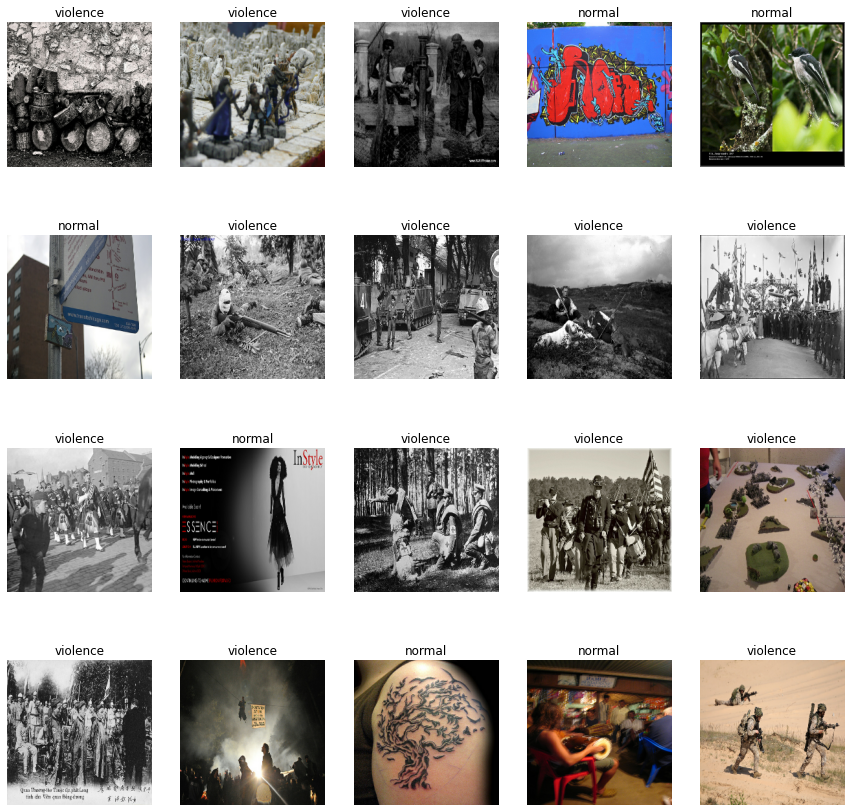

In [ ]:
plt.figure(figsize=(15, 15))
for img ,labels in dataset.take(1):
  for i in range(20):
    plt.subplot(4 ,5, i+1)
    plt.imshow(img[i].numpy().astype('int32'))
    plt.title(class_names[labels[i]])

    plt.axis('off')

In [ ]:
def split_data(dataset , train_split =0.7 , val_split =0.3):
  dataset_size  =len(dataset)

  train_size = int(train_split*dataset_size)
  val_size = int(val_split*dataset_size)

  train_data = dataset.take(train_size)
  val_data =dataset.skip(train_size).take(val_size)

  return train_data ,val_data

In [ ]:
train_data , val_data = split_data(dataset)

In [ ]:
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.Resizing(224,224),
    
])

data_augmentation =tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.4),
  
 
])

In [ ]:
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image

In [ ]:
input_shape = (224 , 224 ,3)

base_model = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet' ,include_top = False ,input_shape = input_shape)
base_model.trainable =False

inputs =tf.keras.Input(shape = input_shape)

x = resize_rescale(inputs)
x = data_augmentation(x)

x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024 , activation = 'relu')(x)
x= tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

ResNet50Model = Model(inputs , outputs)




ResNet50Model.compile(
    optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy']
)


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
ResNet50Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [ ]:
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(patience=10)
callback_list = [ModelCheckpoint(filepath = '/content/drive/MyDrive/HACKMOL/Violence_ResNet50Model.h5' 
                                 ,monitor='val_accuracy' ,verbose = 1 , save_best_only = True )]

model = ResNet50Model.fit(train_data , epochs = 10 ,validation_data =val_data , callbacks=[callback_list, early_stopping])

Epoch 1/10


23/23 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.5421
Epoch 1: val_accuracy improved from -inf to 0.60069, saving model to /content/drive/MyDrive/HACKMOL/Violence_ResNet50Model.h5
23/23 [==============================] - 95s 4s/step - loss: 0.7194 - accuracy: 0.5421 - val_loss: 0.6322 - val_accuracy: 0.6007
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.6655 - accuracy: 0.6046
Epoch 2: val_accuracy improved from 0.60069 to 0.67014, saving model to /content/drive/MyDrive/HACKMOL/Violence_ResNet50Model.h5
23/23 [==============================] - 13s 530ms/step - loss: 0.6655 - accuracy: 0.6046 - val_loss: 0.6336 - val_accuracy: 0.6701
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.6630
Epoch 3: val_accuracy did not improve from 0.67014
23/23 [==============================] - 12s 476ms/step - loss: 0.6323 - accuracy: 0.6630 - val_loss: 0.6083 - val_accuracy: 0.6458
Epoch 4/10
23/23 [============